In [97]:
from collections import defaultdict
import timeit
import matplotlib.pyplot as plt

def compare_int_long(intList, testInt):
    '''
    compare a list of integers to a single integer.
    
    return true if any 2 integers (i1 + i2) == testInt
    false otherwise
    '''
    test = False
    for idx1 in range(len(intList)):
        int1 = intList[idx1]
        for idx2 in range(len(intList)):
            if idx2 != idx1:
                int2 = intList[idx2]
                if int1 + int2 == testInt:
                    test = True
                
    return test

def compare_int_hash(intList, testInt):
    '''
    compare a list of integers to a single integer.
    
    return true if any 2 integers (i1 + i2) == testInt
    false otherwise
    '''
    intHash = defaultdict(bool)
    intCount = defaultdict(int)
    listLength = len(intList)
    test = False
    for idx in range(listLength):
        val = testInt - intList[idx]
        intHash[val] = True
        intCount[val] += 1
    for idx in range(listLength):
        if intHash[intList[idx]]:
            if intCount[intList[idx]] > 1:
                test = True   
    return test

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [92]:
intList_size1000 = np.random.randint(0, high=9, size=1000)
testInt1 = 4
testInt2 = 20

In [130]:
timeIntLong = []
sizeInt = []
for lsize in range(100, 10000, 500):
    intList = np.random.randint(0, high=9, size=lsize)
    wrapped = wrapper(compare_int_long, intList, testInt1)
    longtime = timeit.timeit(wrapped, number=1)
    timeIntLong.append(longtime)
    sizeInt.append(lsize)
timeIntLong

[0.005533000001378241,
 0.20515999999952328,
 0.6308204000015394,
 1.448292199998832,
 2.3759437000007892,
 3.6173228999996354,
 5.048845600000277,
 9.299165899999934,
 11.272016699998858,
 12.457199099999343,
 14.497151200001099,
 18.195852599999853,
 23.97299319999911,
 27.56886730000042,
 28.931258399999933,
 35.09656050000012,
 39.73358580000058,
 44.31556040000032,
 46.398791899999196,
 51.92803439999989]

In [128]:
timeIntHash = []
sizeInt = []
for lsize in range(100, 10000, 500):
    intList = np.random.randint(0, high=9, size=lsize)
    wrapped = wrapper(compare_int_hash, intList, testInt1)
    hashTime = timeit.timeit(wrapped, number=20)
    timeIntHash.append(hashTime/20)
    sizeInt.append(lsize)
timeIntHash

[0.00010509499998079264,
 0.0008290949999718578,
 0.0020829650000450785,
 0.0019868999999744117,
 0.002135794999958307,
 0.002635724999981903,
 0.0032044800000221585,
 0.003700885000034759,
 0.0043362749999687365,
 0.004667724999944767,
 0.005191884999931062,
 0.005927874999997584,
 0.00726534499999616,
 0.007187559999965743,
 0.007500699999945936,
 0.007963825000024372,
 0.008765579999999319,
 0.008858744999997725,
 0.009344014999987849,
 0.009854995000023337]

Text(0.5, 0, 'array size')

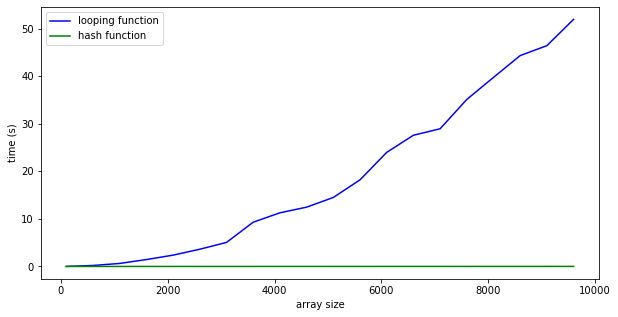

In [131]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sizeInt, timeIntLong, color='blue', label='looping function')
ax.plot(sizeInt, timeIntHash, color='green', label='hash function')
ax.legend()
ax.set_ylabel('time (s)')
ax.set_xlabel('array size')

Text(0.5, 0, 'array size')

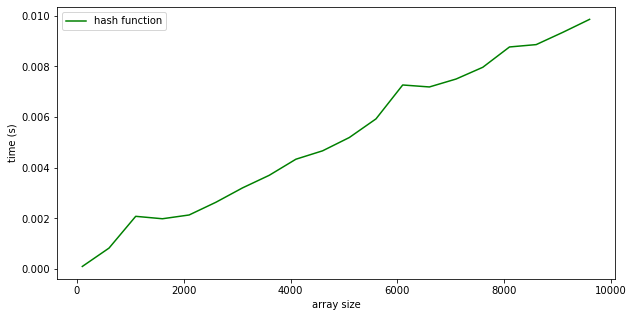

In [132]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(sizeInt, timeIntHash, color='green', label='hash function')
ax.legend()
ax.set_ylabel('time (s)')
ax.set_xlabel('array size')